In [1]:
from datasets.get_datasets import *
import time
from src.genetic import *

from src.predicate import *
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
bk = {
      'imdb': ['workedunder(+person,+person).',
              'workedunder(+person,-person).',
              'workedunder(-person,+person).',
              'female(+person).',
              'actor(+person).',
              'director(+person).',
              'movie(+movie,+person).',
              'movie(+movie,-person).',
              'movie(-movie,+person).',
              'genre(+person,+genre).'],
      'uwcse': ['professor(+person).',
        'student(+person).',
        'advisedby(+person,+person).',
        'advisedby(+person,-person).',
        'advisedby(-person,+person).',
        'tempadvisedby(+person,+person).',
        'tempadvisedby(+person,-person).',
        'tempadvisedby(-person,+person).',
        'ta(+course,+person,+quarter).',
        'ta(-course,-person,+quarter).',
        'ta(+course,-person,-quarter).',
        'ta(-course,+person,-quarter).',
        'hasposition(+person,+faculty).',
        'hasposition(+person,-faculty).',
        'hasposition(-person,+faculty).',
        'publication(+title,+person).',
        'publication(+title,-person).',
        'publication(-title,+person).',
        'inphase(+person,+prequals).',
        'inphase(+person,-prequals).',
        'inphase(-person,+prequals).',
        'courselevel(+course,+level).',
        'courselevel(+course,-level).',
        'courselevel(-course,+level).',
        'yearsinprogram(+person,+year).',
        'yearsinprogram(-person,+year).',
        'yearsinprogram(+person,-year).',
        'projectmember(+project,+person).',
        'projectmember(+project,-person).',
        'projectmember(-project,+person).',
        'sameproject(+project,+project).',
        'sameproject(+project,-project).',
        'sameproject(-project,+project).',
        'samecourse(+course,+course).',
        'samecourse(+course,-course).',
        'samecourse(-course,+course).',
        'sameperson(+person,+person).',
        'sameperson(+person,-person).',
        'sameperson(-person,+person).',],
      'cora': ['sameauthor(+author,+author).',
              'sameauthor(+author,-author).',
              'sameauthor(-author,+author).',
              'samebib(+class,+class).',
              'samebib(+class,-class).',
              'samebib(-class,+class).',
              'sametitle(+title,+title).',
              'sametitle(+title,-title).',
              'sametitle(-title,+title).',
              'samevenue(+venue,+venue).',
              'samevenue(+venue,-venue).',
              'samevenue(-venue,+venue).',
              'author(+class,+author).',
              'author(+class,-author).',
              'author(-class,+author).',
              'title(+class,+title).',
              'title(+class,-title).',
              'title(-class,+title).',
              'venue(+class,+venue).',
              'venue(+class,-venue).',
              'venue(-class,+venue).',
              'haswordauthor(+author,+word).',
              'haswordauthor(+author,-word).',
              'haswordauthor(-author,+word).',
              'haswordtitle(+title,+word).',
              'haswordtitle(+title,-word).',
              'haswordtitle(-title,+word).',
              'haswordvenue(+venue,+word).',
              'haswordvenue(+venue,-word).',
              'haswordvenue(-venue,+word).'],
      'webkb': ['coursepage(+page).',
                'facultypage(+page).',
                'studentpage(+page).',
                'researchprojectpage(+page).',
                'linkto(+id,+page,+page).',
                'linkto(+id,-page,-page).',
                'linkto(-id,-page,+page).',
                'linkto(-id,+page,-page).',
                'has(+word,+page).',
                'has(+word,-page).',
                'has(-word,+page).',
                'hasalphanumericword(+id).',
                'allwordscapitalized(+id).',
                'instructorsof(+page,+page).',
                'instructorsof(+page,-page).',
                'instructorsof(-page,+page).',
                'hasanchor(+word,+page).',
                'hasanchor(+word,-page).',
                'hasanchor(-word,+page).',
                'membersofproject(+page,+page).',
                'membersofproject(+page,-page).',
                'membersofproject(-page,+page).',
                'departmentof(+page,+page).',
                'departmentof(+page,-page).',
                'departmentof(-page,+page).',
                'pageclass(+page,+class).',
                'pageclass(+page,-class).',
                'pageclass(-page,+class).'],
      'twitter': ['accounttype(+account,+type).',
                  'accounttype(+account,-type).',
                  'accounttype(-account,+type).',
                  'tweets(+account,+word).',
                  'tweets(+account,-word).',
                  'tweets(-account,+word).',
                  'follows(+account,+account).',
                  'follows(+account,-account).',
                  'follows(-account,+account).',],
      'yeast': ['location(+protein,+loc).',
                'location(+protein,-loc).',
                'location(-protein,+loc).',
                'interaction(+protein,+protein).',
                'interaction(+protein,-protein).',
                'interaction(-protein,+protein).',
                'proteinclass(+protein,+class).',
                'proteinclass(+protein,-class).',
                'proteinclass(-protein,+class).',
                'enzyme(+protein,+enz).',
                'enzyme(+protein,-enz).',
                'enzyme(-protein,+enz).',
                'function(+protein,+fun).',
                'function(+protein,-fun).',
                'function(-protein,+fun).',
                'complex(+protein,+com).',
                'complex(+protein,-com).',
                'complex(-protein,+com).',
                'phenotype(+protein,+phe).',
                'phenotype(+protein,-phe).',
                'phenotype(-protein,+phe).'],
      'nell_sports': ['athleteledsportsteam(+athlete,+sportsteam).',
              'athleteledsportsteam(+athlete,-sportsteam).',
              'athleteledsportsteam(-athlete,+sportsteam).',
              'athleteplaysforteam(+athlete,+sportsteam).',
              'athleteplaysforteam(+athlete,-sportsteam).',
              'athleteplaysforteam(-athlete,+sportsteam).',
              'athleteplaysinleague(+athlete,+sportsleague).',
              'athleteplaysinleague(+athlete,-sportsleague).',
              'athleteplaysinleague(-athlete,+sportsleague).',
              'athleteplayssport(+athlete,+sport).',
              'athleteplayssport(+athlete,-sport).',
              'athleteplayssport(-athlete,+sport).',
              'teamalsoknownas(+sportsteam,+sportsteam).',
              'teamalsoknownas(+sportsteam,-sportsteam).',
              'teamalsoknownas(-sportsteam,+sportsteam).',
              'teamplaysagainstteam(+sportsteam,+sportsteam).',
              'teamplaysagainstteam(+sportsteam,-sportsteam).',
              'teamplaysagainstteam(-sportsteam,+sportsteam).',
              'teamplaysinleague(+sportsteam,+sportsleague).',
              'teamplaysinleague(+sportsteam,-sportsleague).',
              'teamplaysinleague(-sportsteam,+sportsleague).',
              'teamplayssport(+sportsteam,+sport).',
              'teamplayssport(+sportsteam,-sport).',
              'teamplayssport(-sportsteam,+sport).'],
      'nell_finances': ['countryhascompanyoffice(+country,+company).',
                        'countryhascompanyoffice(+country,-company).',
                        'countryhascompanyoffice(-country,+company).',
                        'companyeconomicsector(+company,+sector).',
                        'companyeconomicsector(+company,-sector).',
                        'companyeconomicsector(-company,+sector).',
                        'economicsectorcompany(+sector,-company).',
                        'economicsectorcompany(-sector,+company).',
                        'companyceo(+company,+person).',
                        'companyceo(+company,-person).',
                        'companyceo(-company,+person).',
                        'companyalsoknownas(+company,+company).',
                        'companyalsoknownas(+company,-company).',
                        'companyalsoknownas(-company,+company).',
                        'cityhascompanyoffice(+city,+company).',
                        'cityhascompanyoffice(+city,-company).',
                        'cityhascompanyoffice(-city,+company).',
                        'acquired(+company,+company).',
                        'acquired(+company,-company).',
                        'acquired(-company,+company).',
                        'bankbankincountry(+person,+country).',
                        'bankbankincountry(+person,-country).',
                        'bankbankincountry(-person,+country).',
                        'bankboughtbank(+company,+company).',
                        'bankboughtbank(+company,-company).',
                        'bankboughtbank(-company,+company).',
                        'bankchiefexecutiveceo(+company,+person).',
                        'bankchiefexecutiveceo(+company,-person).',
                        'bankchiefexecutiveceo(-company,+person).']}


# Testing transfer between IMDB and UW-CSE using groot

In [3]:
bk_source = bk['imdb']
bk_target = bk['uwcse']

In [4]:
imdb_dataset = datasets.load('imdb', bk_source, target='workedunder', seed=441773) #facts, pos, neg
uwcse_dataset = datasets.load('uwcse', bk_target, target='advisedby', seed=441773) #facts, pos, neg

In [5]:
train_facts_source = []
train_pos_source = []
train_neg_source = []
for i in range(0, len(imdb_dataset)):
    train_facts_source.extend(imdb_dataset[0][i])
    train_pos_source.extend(imdb_dataset[1][i])
    train_neg_source.extend(imdb_dataset[2][i])

In [6]:
target = ['workedunder']

background_knowledge_src = boostsrl.modes(bk_source, target, useStdLogicVariables=False, 
                                          maxTreeDepth=3, nodeSize=2, numOfClauses=8)

model_src = boostsrl.train(background_knowledge_src, train_pos_source, train_neg_source, train_facts_source, trees=10)

In [7]:
structured_src = []
for i in range(0, 10):
    try:
        structured_src.append(model_src.get_structured_tree(treenumber=i+1).copy())
    except:
        structured_src.append(model_src.get_structured_tree(treenumber='combine').copy())

In [8]:
#pred_target é : pred_target = [('movie', '+,-'), ('director', '+'),...]
import re
pred_target = []
for pred in bk_target:
    modes = ','.join([pred[occur.start()] for occur in re.finditer('[+\-]', pred)])
    pred_target.append((pred.split('(')[0], modes))

In [9]:
def get_branch(curr_value, next_value):
    if curr_value == '': 
        return next_value
    return '{},{}'.format(curr_value, next_value)

def define_individual(structured_tree, tree_number):
    individual_tree = []
    target = structured_tree[0]
    nodes = structured_tree[1]
    for values, node in nodes.items():
        if values == '': 
            branch = '{} :- {}.'.format(target, node)
        else: branch = '{}.'.format(node)
        left_branch = 'true' if get_branch(values, 'true') in nodes  else 'false'
        right_branch = 'true' if get_branch(values, 'false') in nodes else 'false'
        individual_tree.append('{};{};{};{};{}'.format(tree_number, values, 
                                                  branch, left_branch, right_branch))
    return individual_tree

src_struct = copy.deepcopy(structured_src)
new_src_struct = []
for i in range(0, len(src_struct)):
    new_src_struct.append(define_individual(src_struct[i], i))


### Starting the transfer between source and target

In [10]:
train_facts = uwcse_dataset[0][1:]
train_pos = uwcse_dataset[1][1:]
train_neg = uwcse_dataset[2][1:]

test_facts = uwcse_dataset[0][0]
test_pos = uwcse_dataset[1][0]
test_neg = uwcse_dataset[2][0]

In [11]:
start = time.time()
# pred = Predicate(bk_source, bk_target, pred_target)
results = genetic(new_src_struct, 'advisedby', 'workedunder', train_pos, 
                  train_neg, train_facts, bk_source, bk_target, pred_target,
                        NUM_GEN=15, pop_size=30)
print("FIM: ", time.time()-start)

/usr/local/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.3464065
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.009350061109425972
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.316959
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.006822348679157341
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.39709075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.007556205078443806
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.33

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27772800000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.00515713830530072
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.29718900000000004
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0053779279931958955
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.38123475
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.007728720378400297
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.28679525000000006
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.004444070508835327
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.31410825000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0053974662747904205
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.30683775
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.005072651001941691
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.277717
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0039506566542791164
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.26696825
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0030462272875640857
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.29700224999999997
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.00631365818583014
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA


MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.31952625
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.006592897177076242
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.278218
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.005128898176021823
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.26231225
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.004381421993770963
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.2

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29942575
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0018340331751361507
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
GENERATION:  3
(0.29529025000000003,) False
(0.2618155,) True
(0.31952625,) False
(0.278218,) False
(0.26231225,) False
(0.26368475,) False
(0.29572624999999997,) False
(0.2939505,) False
(0.31558474999999997,) False
(0.279023,) False
(0.315222,) False
(0.28019525,) False
(0.27259025,) False
(0.27973624999999996,) False
(0.256607,) True
(0.288533,) False
(0.28712275,) False
(0.28086049999999996,) False
(0.30652425,) False
(0.26138849999999997,) False
(0.28048825,) False
(0.31485425,) False
(0.27136425,) False
(0.2523245,) True
(0.26822225,) False
(0.267328,) False
(0.28917325,) False
(0.27140149999999996,) False
(0.29942575,) False
(0.26231225,) False
best

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.274026
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0038245857291999644
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.28749800000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.005645186577961784
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.282122
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0030328522054330264
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
A

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29453925
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0026714185721260506
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.29241174999999997
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0049973319569046005
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.29535775
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.004919218402093975
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.93002

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.26060725
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004800927169568398
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.2893795
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.004538786098727284
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.25598275000000004
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004199329849809369
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA


MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.30930025000000005
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.002786656632507865
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
GENERATION:  6
(0.2860535,) False
(0.250714,) True
(0.2507935,) False
(0.26060725,) False
(0.2893795,) False
(0.25598275000000004,) False
(0.26411025,) False
(0.28608725,) False
(0.27901200000000004,) False
(0.29627525,) False
(0.2878775,) False
(0.2694025,) False
(0.2826535,) False
(0.28056099999999995,) False
(0.27542425000000004,) False
(0.2805425,) False
(0.2453995,) True
(0.2661805,) False
(0.2730845,) False
(0.26941475,) False
(0.26324000000000003,) False
(0.25710875,) False
(0.2453995,) False
(0.30411449999999995,) False
(0.27276500000000004,) False
(0.26614250000000006,) False
(0.2998505,) False
(0.27915349999999994,) False
(0.2873314999999

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27612475
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.004601988014706251
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.28249599999999997
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005081952429922964
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29097575
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004183135329809447
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.27291975
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0038288298718407495
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.332978
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.009204395879143845
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.31026400000000004
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.006631139155529755
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.93002800

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27101450000000005
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.005054913871669817
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27113050000000005
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0050340320072482505
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.2523245
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0046767745562513435
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR: 

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.28183575
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.005551776984668951
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.26297825
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004923443021656696
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.29419775000000004
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.006902906756396188
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
GENERATION:  9
(0.264115

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27571775
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.00485723210146478
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.25202800000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004521392374037004
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.2811035
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0042315818850637826
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA


MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.33817125
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.00695165808908205
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.26527175000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0030251249044461036
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.27570500000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005129381980316947
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
----------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.36149499999999996
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.002404484872067186
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.2597075
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0040495923560279505
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.34715175000000004
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0031497016823026397
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.25278975
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.004519693926307397
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.2701085
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.003664673825867728
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.26220925
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0042008516621632784
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
---------------

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.30280475
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.005164413489206703
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.27369425000000003
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0023691917793838466
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27919025
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.00509443708249498
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.26730425
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.004569501360925508
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.261211
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.004604999077090019
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.28653825
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0021585354265102994
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:

MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29256525
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.001003989884162173
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.28029125
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.0021136153120896836
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27239025
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0050889900950483215
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR

MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.27059325
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.0051493364317647845
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC ROC:  0.93547
CLL:  -0.26889475
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.006465586685483377
AUC ROC:  0.004100778645574519
CLL:  0.00482148169005132
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.9300280000000001
AUC ROC:  0.9514677500000001
CLL:  -0.29084325
PREC:  0.6928698750000001
RECALL:  1.0
F1:  0.93939575
-------------------
STD
AUC PR:  0.010525129999197164
AUC ROC:  0.004794724777033602
CLL:  0.00011501385786069085
PREC:  0.19292405393861436
RECALL:  0.0
F1:  0.0036277763419896667
-------------------
MEDIA
AUC PR:  0.88573975
AUC R

### Testing the best individual

In [40]:
ind = results[0].population[4]
refine = []
for tree in ind.modified_src_tree:
    refine.extend(tree)
    
transfer = ind.transfer.transfer
ind.fitness

deap.creator.FitnessMin((0.24502424999999997,))

In [23]:
refine

['0;;workedunder00(A,B):- director01(B), actor01(A);true;false',
 '0;true;movie02(C, A), movie03(C, B).;false;false',
 '1;;workedunder10(A,B):- director11(B), actor11(A);true;false',
 '1;true;movie12(C, A), movie13(C, B).;false;false',
 '2;;workedunder20(A,B):- director21(B), actor21(A);true;false',
 '2;true;movie22(C, A), movie23(C, B).;false;false',
 '3;;workedunder30(A,B):- director31(B), actor31(A);true;false',
 '3;true;movie32(C, A), movie33(C, B).;false;false',
 '4;;workedunder40(A,B):- actor41(A), director41(B);true;false',
 '4;true;movie42(C, A), movie43(C, B).;false;false',
 '5;;workedunder50(A,B):- actor51(A), director51(B);true;false',
 '5;true;movie52(C, A), movie53(C, B).;false;false',
 '6;;workedunder60(A,B):- director61(B), actor61(A);true;false',
 '6;true;movie62(C, A), movie63(C, B).;false;false',
 '7;;workedunder70(A,B):- actor71(A), director71(B);true;false',
 '7;true;movie72(C, A), movie73(C, B).;false;false',
 '8;;workedunder80(A,B):- director81(B), actor81(A);true

In [24]:
transfer

['source: workedunder00(person,person).',
 'target: advisedby(person,person).',
 'setMap: workedunder00(A,B)=advisedby(A,B).',
 'source: director01(person).',
 'target: professor(person).',
 'setMap: director01(A)=professor(A).',
 'source: actor01(person).',
 'target: student(person).',
 'setMap: actor01(A)=student(A).',
 'source: movie02(movie,person).',
 'target: publication(title,person).',
 'setMap: movie02(A,B)=publication(A,B).',
 'source: movie03(movie,person).',
 'setMap: movie03(A,B)=publication(A,B).',
 'source: workedunder10(person,person).',
 'setMap: workedunder10(A,B)=advisedby(A,B).',
 'source: director11(person).',
 'setMap: director11(A)=professor(A).',
 'source: actor11(person).',
 'setMap: actor11(A)=student(A).',
 'source: movie12(movie,person).',
 'setMap: movie12(A,B)=publication(A,B).',
 'source: movie13(movie,person).',
 'setMap: movie13(A,B)=publication(A,B).',
 'source: workedunder20(person,person).',
 'setMap: workedunder20(A,B)=advisedby(A,B).',
 'source: di

In [25]:
background_train = boostsrl.modes(bk_target, ['advisedby'], useStdLogicVariables=False, 
                                          maxTreeDepth=3, nodeSize=2, numOfClauses=8)


In [26]:
tr_train_pos = []
tr_train_neg = []
tr_train_facts = []

for i in range(0, len(train_pos)):
    tr_train_pos.extend(train_pos[i])
    tr_train_neg.extend(train_neg[i])
    tr_train_facts.extend(train_facts[i])

model_tr = boostsrl.train(background_train, tr_train_pos, tr_train_neg, 
                                      tr_train_facts, refine=refine, transfer=transfer,
                                      trees=10)

In [27]:
test_model = boostsrl.test(model_tr, test_pos, test_neg, 
                                       test_facts, trees=10)
test_model.summarize_results()

{'AUC ROC': 0.965714,
 'AUC PR': 0.959106,
 'CLL': -0.227971,
 'Precision': [0.897436, 0.5],
 'Recall': 1.0,
 'F1': 0.945946}

### Verifying results

In [28]:
f_results = test_model.inference_results('advisedby')

In [29]:
y_pred = []
y_true = []

for key, value in f_results.items():
    if '!' in key:
        y_true.append(0)
        y_pred.append(0) if value > 0.5 else y_pred.append(1)
    else:
        y_true.append(1)
        y_pred.append(1) if value > 0.5 else y_pred.append(0)

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#tn, fp, fn, tp
cm = confusion_matrix(y_true, y_pred)
list_cm = cm.ravel()

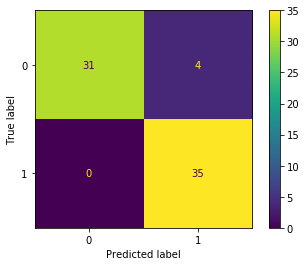

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

In [32]:
cm

array([[31,  4],
       [ 0, 35]])

In [33]:
from sklearn.metrics import average_precision_score, roc_auc_score

average_precision_score(y_true, y_pred)

0.8974358974358975

In [34]:
roc_auc_score(y_true, y_pred)

0.9428571428571428

### Comparing with TreeBoostler

In [41]:
import sys  
sys.path.insert(0, '../TreeBoostler')

from revision import *
from transfer import *
from mapping import *
from boostsrl import boostsrl
import os

predicate = 'workedunder'
to_predicate = 'advisedby'

def print_function(message):
    global experiment_title
    global nbr
    if not os.path.exists('experiments/' + experiment_title):
        os.makedirs('experiments/' + experiment_title)
    with open('experiments/' + experiment_title + '/' + str(nbr) + '_' + experiment_title + '.txt', 'a') as f:
        print(message, file=f)
        print(message)

In [42]:
transferred_structured = structured_src
tr_file = transfer.get_transfer_file(bk['imdb'], bk['uwcse'], predicate, to_predicate, searchArgPermutation=True, allowSameTargetMap=False)
new_target = to_predicate

In [43]:
tr_train_pos = []
tr_train_neg = []
tr_train_facts = []

for i in range(0, len(train_pos)):
    tr_train_pos.extend(train_pos[i])
    tr_train_neg.extend(train_neg[i])
    tr_train_facts.extend(train_facts[i])

In [44]:
# transfer and revision theory
experiment_title = 'IMDB -> UW-CSE'
nbr = 1
background = boostsrl.modes(bk['uwcse'], [to_predicate], useStdLogicVariables=False, maxTreeDepth=3, nodeSize=2, numOfClauses=8)
[model, t_results, structured, pl_t_results] = revision.theory_revision(background, boostsrl, target, tr_train_pos, tr_train_neg, tr_train_facts, test_pos, test_neg, test_facts, structured_src, transfer=tr_file, trees=10, max_revision_iterations=1, print_function=print_function)



******************************************
Performing Parameter Learning
******************************************
Refine
0;;workedunder(A, B) :- director(B), actor(A).;true;false
0;true;movie(C, A), movie(C, B).;false;false
1;;workedunder(A, B) :- director(B), actor(A).;true;false
1;true;movie(C, A), movie(C, B).;false;false
2;;workedunder(A, B) :- director(B), actor(A).;true;false
2;true;movie(C, A), movie(C, B).;false;false
3;;workedunder(A, B) :- director(B), actor(A).;true;false
3;true;movie(C, A), movie(C, B).;false;false
4;;workedunder(A, B) :- actor(A), director(B).;true;false
4;true;movie(C, A), movie(C, B).;false;false
5;;workedunder(A, B) :- actor(A), director(B).;true;false
5;true;movie(C, A), movie(C, B).;false;false
6;;workedunder(A, B) :- director(B), actor(A).;true;false
6;true;movie(C, A), movie(C, B).;false;false
7;;workedunder(A, B) :- actor(A), director(B).;true;false
7;true;movie(C, A), movie(C, B).;false;false
8;;workedunder(A, B) :- director(B), actor(A).;true;f

### Making plots

In [181]:
m_auc_pr = [0.9300280000000001,0.88573975,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001,0.9300280000000001]
m_auc_roc = [0.9514677500000001,0.93547,0.93547,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001,0.9514677500000001]
m_cll = [-0.26240450000000004,-0.26231225,-0.2523245,-0.2523245,-0.2523245,-0.2453995,-0.2453995,-0.2453995,-0.2453995,-0.2453995,-0.2453995,-0.2453995,-0.2453995,-0.2453995,-0.24502424999999997]
m_rec = [0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001,0.6928698750000001]
m_prec = [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]
m_f1 = [0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575,0.93939575]

s_auc_pr = [0.010525129999197164,0.006465586685483377,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164,0.010525129999197164]
s_auc_roc = [0.004794724777033602,0.004100778645574519,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602,0.004794724777033602]
s_cll = [0.0046224295830223335,0.004381421993770963,0.0046767745562513435,0.0046767745562513435,0.0046767745562513435,0.004956313070216613,0.004956313070216613,0.004956313070216613,0.004956313070216613,0.004956313070216613,0.004956313070216613,0.004956313070216613,0.004956313070216613,0.004956313070216613,0.005715456778552346]
s_rec = [0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436,0.19292405393861436]
s_prec = [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
s_f1 = [0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667,0.0036277763419896667]


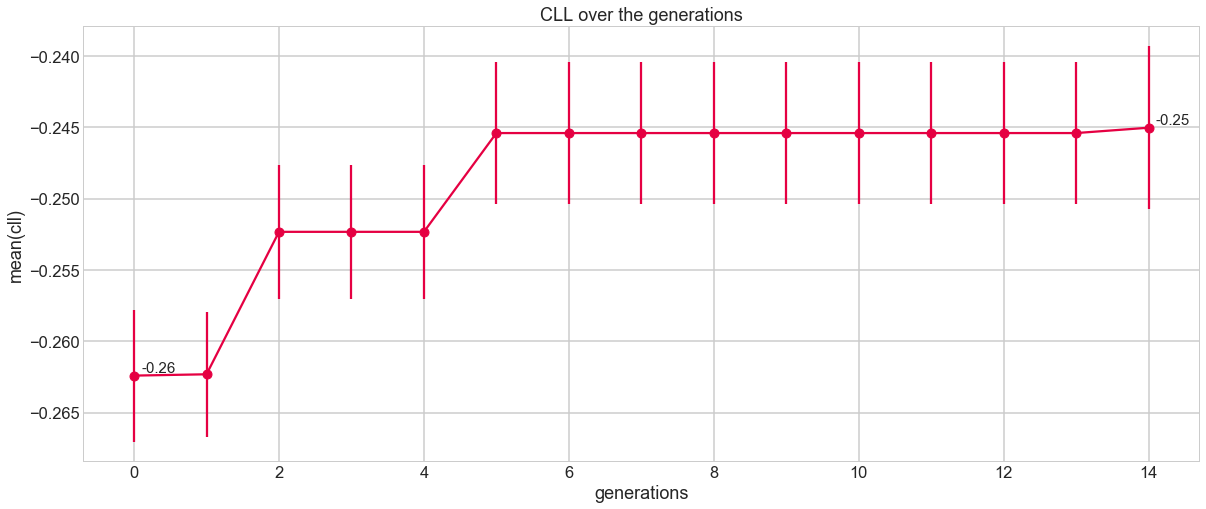

In [187]:
from src.plots import *

plots = Plots()
plots.make_plot(m_cll, s_cll, 'cll_imdb_uwcse')

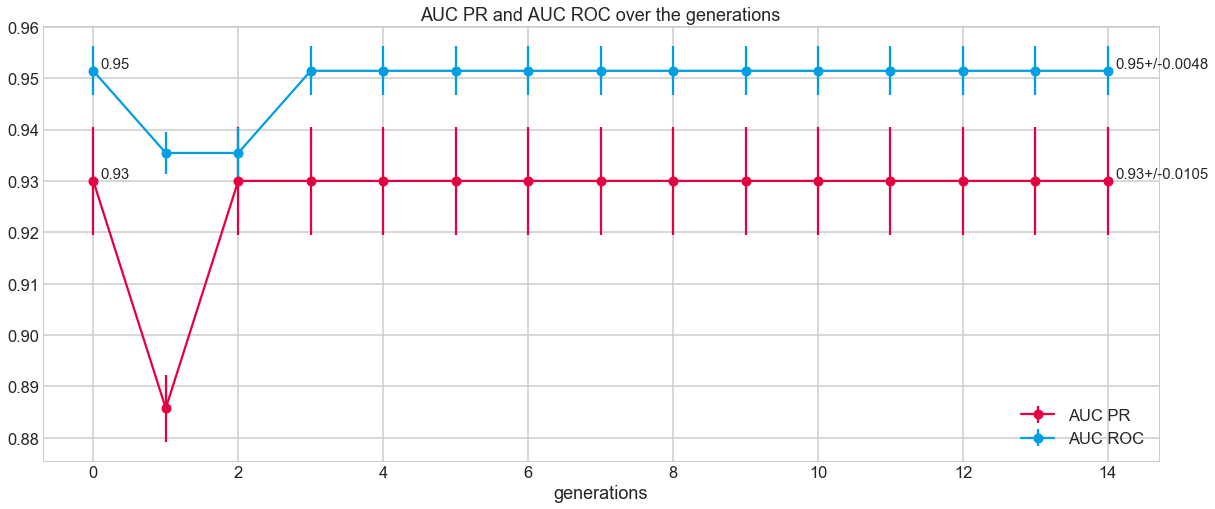

In [188]:
plots.make_many_plots([m_auc_pr, m_auc_roc], [s_auc_pr, s_auc_roc], 'auc_pr_roc_imdb_uwcse', data_name=['AUC PR', 'AUC ROC'], title='AUC PR and AUC ROC over the generations')


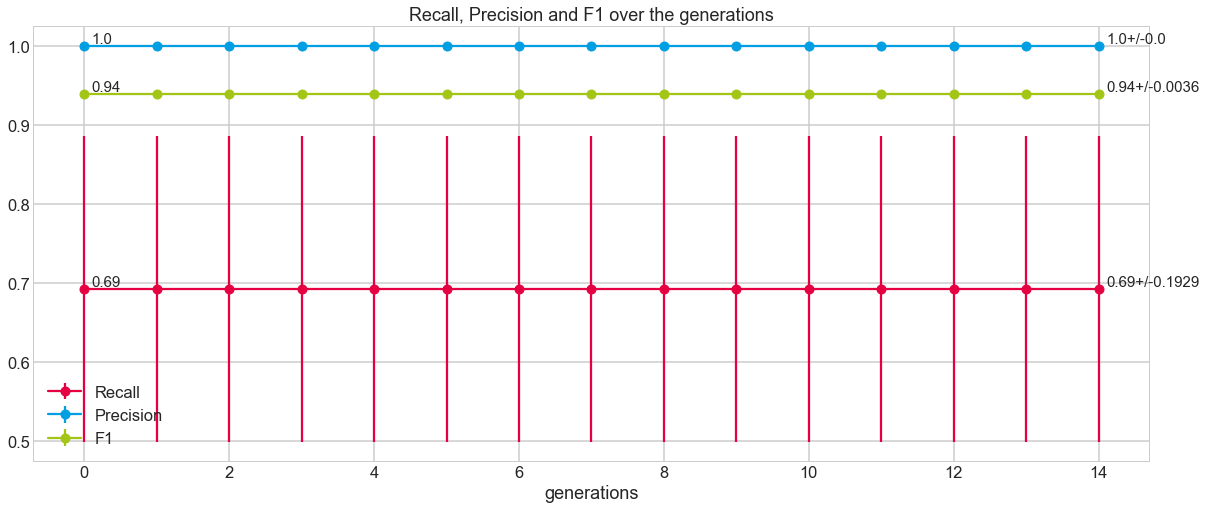

In [189]:
plots.make_many_plots([m_rec, m_prec, m_f1], [s_rec, s_prec, s_f1], 'f1_rec_prec_imdb_uwcse', data_name=['Recall', 'Precision', 'F1'], title='Recall, Precision and F1 over the generations')
